# Dating Score Evalution
Right now, we are going to rank the restaurants by dating scores. To calculate the "Dating Score" for each restaurant using the metrics totalScore, reviewsCount, and the keyword/adjective counts extracted from the reviews.
## Process the Review Data
First, we need to clean the review data and extract the key words we need for calculating the dating score.

In [1]:
!pip install requests

In [2]:
import pandas as pd
import geopandas as gpd
import altair as alt
import numpy as np
!pip install cenpy
import cenpy

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/luoxiaoyi/miniforge3/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [6]:
import pandas as pd

file_path = "data/restaurants_reviews_final.geojson"  
review = gpd.read_file(file_path)

review.head()


,title,price,categoryName,address,neighborhood,street,city,postalCode,state,location,totalScore,reviewsCount,url,review_text,latitude,longitude,geometry
0,Phil-Am Kusina,$10–20,Filipino restaurant,"556 Tompkins Ave., Staten Island, NY 10305",Rosebank,556 Tompkins Ave.,Staten Island,10305,New York,"{'lat': 40.6124623, 'lng': -74.071427}",4.7,320,https://www.google.com/maps/search/?api=1&quer...,I bring my family and friends here. Excellent ...,40.612462,-74.071427,POINT (-74.07143 40.61246)
1,Phil-Am Kusina,$10–20,Filipino restaurant,"556 Tompkins Ave., Staten Island, NY 10305",Rosebank,556 Tompkins Ave.,Staten Island,10305,New York,"{'lat': 40.6124623, 'lng': -74.071427}",4.7,320,https://www.google.com/maps/search/?api=1&quer...,I usually enjoy Filipino lechon kawali (fried ...,40.612462,-74.071427,POINT (-74.07143 40.61246)
2,Phil-Am Kusina,$10–20,Filipino restaurant,"556 Tompkins Ave., Staten Island, NY 10305",Rosebank,556 Tompkins Ave.,Staten Island,10305,New York,"{'lat': 40.6124623, 'lng': -74.071427}",4.7,320,https://www.google.com/maps/search/?api=1&quer...,Amazing food and amazing service. Every time I...,40.612462,-74.071427,POINT (-74.07143 40.61246)
3,Phil-Am Kusina,$10–20,Filipino restaurant,"556 Tompkins Ave., Staten Island, NY 10305",Rosebank,556 Tompkins Ave.,Staten Island,10305,New York,"{'lat': 40.6124623, 'lng': -74.071427}",4.7,320,https://www.google.com/maps/search/?api=1&quer...,What a gem in Staten Island. The food was abso...,40.612462,-74.071427,POINT (-74.07143 40.61246)
4,Phil-Am Kusina,$10–20,Filipino restaurant,"556 Tompkins Ave., Staten Island, NY 10305",Rosebank,556 Tompkins Ave.,Staten Island,10305,New York,"{'lat': 40.6124623, 'lng': -74.071427}",4.7,320,https://www.google.com/maps/search/?api=1&quer...,This is THE best tasting Philippines Restauran...,40.612462,-74.071427,POINT (-74.07143 40.61246)


In [7]:
!pip install folium matplotlib

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import re

In [9]:
print(review.columns)

Index(['title', 'price', 'categoryName', 'address', 'neighborhood', 'street',
       'city', 'postalCode', 'state', 'location', 'totalScore', 'reviewsCount',
       'url', 'review_text', 'latitude', 'longitude', 'geometry'],
      dtype='object')


In [11]:
comments = review['review_text'].dropna()

all_text = " ".join(comments)

all_text_cleaned = re.sub(r"[^\w\s]", "", all_text.lower())
words = all_text_cleaned.split()

word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

print("Most common words:", most_common_words)

Most common words: [('the', 32535), ('and', 21330), ('a', 13423), ('was', 13015), ('to', 11165), ('i', 9293), ('of', 7921), ('is', 7303), ('food', 6854), ('for', 6634), ('we', 5718), ('in', 5686), ('it', 5680), ('with', 5034), ('this', 4250), ('service', 4194), ('were', 3887), ('but', 3844), ('my', 3727), ('great', 3522)]


Here is the distribution of the words that occur among reviews.

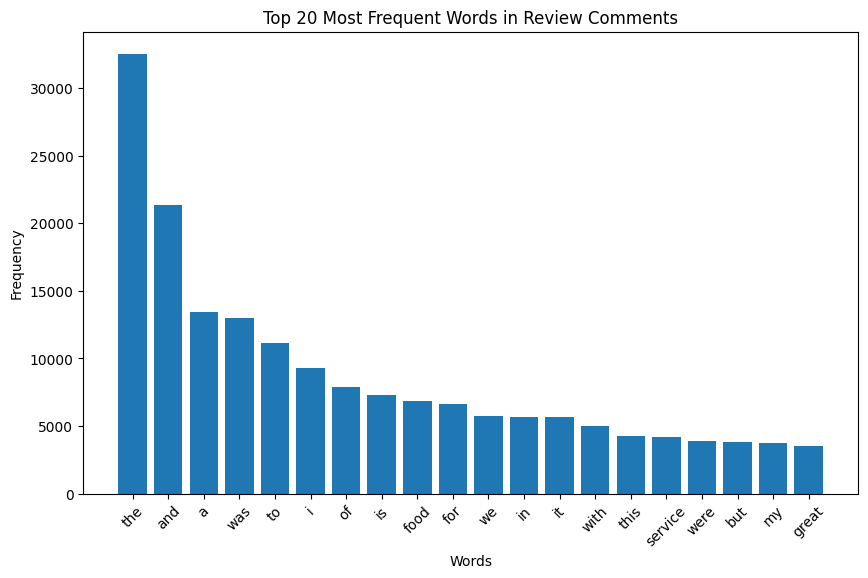

In [12]:
import matplotlib.pyplot as plt

word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'])
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Words in Review Comments")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [13]:
dating_keywords = ['romantic', 'vibe', 'dating', 'love', 'date']

dating_related_counts = {word: word_counts[word] for word in dating_keywords}

print("Dating-related keywords and their counts:", dating_related_counts)

Dating-related keywords and their counts: {'romantic': 71, 'vibe': 260, 'dating': 5, 'love': 810, 'date': 194}


In [16]:
!pip install --upgrade nltk

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


tokens = word_tokenize(all_text_cleaned)

tagged_words = pos_tag(tokens)

adjectives = [word for word, tag in tagged_words if tag.startswith('JJ')]

adjective_counts = Counter(adjectives)

most_common_adjectives = adjective_counts.most_common(20)
print("Most common adjectives:", most_common_adjectives)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/luoxiaoyi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/luoxiaoyi/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Most common adjectives: [('great', 3522), ('good', 2866), ('delicious', 1926), ('best', 1679), ('i', 1634), ('nice', 1081), ('excellent', 1063), ('amazing', 869), ('friendly', 690), ('other', 686), ('new', 681), ('special', 648), ('attentive', 613), ('ive', 595), ('fresh', 573), ('wonderful', 570), ('perfect', 569), ('small', 525), ('first', 518), ('more', 504)]


In [20]:
dating_related_adjectives = ['romantic', 'cozy', 'intimate', 'lovely', 'beautiful', 'quiet', 'charming', 
                   'private', 'ambiance', 'special', 'memorable','love']

dating_adjective_counts = {word: adjective_counts[word] for word in dating_related_adjectives if word in adjective_counts}

print("Dating-related adjectives and their counts:", dating_adjective_counts)

Dating-related adjectives and their counts: {'romantic': 70, 'cozy': 138, 'intimate': 74, 'lovely': 135, 'beautiful': 376, 'quiet': 66, 'charming': 18, 'private': 62, 'ambiance': 1, 'special': 648, 'memorable': 192, 'love': 1}


## Calculte the Dating Score
- Aggregate keyword counts and adjective counts for each restaurant.
- Normalize totalScore, reviewsCount, and the combined counts.
- Compute the Dating Score using a weighted formula.
- Rank the restaurants based on their Dating Scores.

In [21]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.preprocessing import MinMaxScaler

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/luoxiaoyi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/luoxiaoyi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
def extract_dating_counts(reviews):
    all_text = " ".join(reviews) 
    tokens = word_tokenize(all_text.lower())  
    tagged_words = pos_tag(tokens)  
    
    word_counts = Counter(tokens)
    adjective_counts = Counter(word for word, tag in tagged_words if tag.startswith('JJ'))
    
    keyword_score = sum(word_counts[word] for word in dating_keywords if word in word_counts)
    adjective_score = sum(adjective_counts[word] for word in dating_related_adjectives if word in adjective_counts)
    
    return keyword_score, adjective_score


In [27]:
restaurant_scores = []

for title, group in review.groupby('title'):
    total_score = group['totalScore'].mean()
    reviews_count = group['reviewsCount'].iloc[0]  
    reviews = group['review_text'].tolist()
    
    keyword_score, adjective_score = extract_dating_counts(reviews)
    combined_score = keyword_score + adjective_score
    
    restaurant_scores.append({
        'title': title,
        'totalScore': total_score,
        'reviewsCount': reviews_count,
        'keywordScore': keyword_score,
        'adjectiveScore': adjective_score,
        'combinedScore': combined_score
    })

aggregated_df = pd.DataFrame(restaurant_scores)

aggregated_df

,title,totalScore,reviewsCount,keywordScore,adjectiveScore,combinedScore
0,53,4.3,457,12,13,25
1,ATOMIX,4.8,389,15,22,37
2,Ai Fiori,4.4,1689,5,17,22
3,Alley 41,4.3,429,4,2,6
4,Altesi,4.2,251,5,15,20
...,...,...,...,...,...,...
174,Y&Y Sushi,4.8,152,9,14,23
175,Yefsi Estiatorio,4.5,412,1,4,5
176,Za-Ya,4.8,169,21,7,28
177,l’abeille,4.6,206,5,46,51


In [28]:
scaler = MinMaxScaler()
normalized_cols = ['totalScore', 'reviewsCount', 'combinedScore']
aggregated_df[normalized_cols] = scaler.fit_transform(aggregated_df[normalized_cols])

w1, w2, w3 = 0.4, 0.3, 0.3  
aggregated_df['DatingScore'] = (
    w1 * aggregated_df['totalScore'] +
    w2 * aggregated_df['reviewsCount'] +
    w3 * aggregated_df['combinedScore']
)

aggregated_df['Rank'] = aggregated_df['DatingScore'].rank(ascending=False)
aggregated_df = aggregated_df.sort_values(by='DatingScore', ascending=False)

print("Top Restaurants by Dating Score:")
print(aggregated_df[['title', 'totalScore', 'reviewsCount', 'combinedScore', 'DatingScore', 'Rank']])


Top Restaurants by Dating Score:
                                   title  totalScore  reviewsCount  \
51     Fogo de Chão Brazilian Steakhouse    0.904762      0.876397   
87                             Le Coucou    0.761905      0.278665   
35                                Daniel    0.809524      0.347333   
108  Nan Xiang Soup Dumplings - Flushing    0.761905      1.000000   
144     Supper Club By Le Petit Parisien    1.000000      0.008464   
..                                   ...         ...           ...   
110                            New Mulan    0.428571      0.119291   
8                                Arirang    0.428571      0.058927   
139                    Shimiaodao Noodle    0.428571      0.039125   
93                           MJ USA 東旺飯店    0.238095      0.027467   
39                                E.A.T.    0.000000      0.168157   

     combinedScore  DatingScore   Rank  
51            0.30     0.714824    1.0  
87            0.94     0.670361    2.0  
35 

In [34]:
import geopandas as gpd

output_path = "/Users/luoxiaoyi/Downloads/24fall-python-final-proposal-kuma_chloe_wenjun_finalproposal-main/pythonfinal/data/DatingScore.csv"
aggregated_df.to_csv(output_path, index=False)

print(f"File successfully saved to: {output_path}")

File successfully saved to: /Users/luoxiaoyi/Downloads/24fall-python-final-proposal-kuma_chloe_wenjun_finalproposal-main/pythonfinal/data/DatingScore.csv
